In [1]:
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd/content/drive/MyDrive/Colab_Notebooks/Machine_Learning/

/content/drive/MyDrive/Colab_Notebooks/Machine_Learning


In [4]:
import h5py
hf = h5py.File("datasets.h5", "r")

In [5]:
a = np.array(hf["/X"]).astype("uint8")
b = np.array(hf["/y"]).astype("uint8")

In [6]:
b = b - 1 

In [7]:
from sklearn.model_selection import train_test_split
# split the dataset twice

# split into 80% training set and 20% test set
X_train, X_test, y_train, y_test = train_test_split (a, b, test_size = 0.20, random_state=1)

# from previous training set split into 0.6 training set and 20% validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [8]:
X_train = X_train.reshape(48300, 256, 192)
X_val = X_val.reshape(16100, 256, 192)
X_test = X_test.reshape(16100,256, 192)

In [9]:
print("X_train.shape:",format(X_train.shape))
print("X_test.shape:",format(X_test.shape))
print("X_val.shape:",format(X_val.shape))
print("y_train.shape:",format(y_train.shape))
print("y_test.shape:",format(y_test.shape))
print("y_val.shape:",format(y_val.shape))

X_train.shape: (48300, 256, 192)
X_test.shape: (16100, 256, 192)
X_val.shape: (16100, 256, 192)
y_train.shape: (48300,)
y_test.shape: (16100,)
y_val.shape: (16100,)


In [10]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(scale=1./256)) #rescale to 0 - 1
model.add(keras.layers.Flatten(input_shape=[256,192]))
model.add(keras.layers.Dense(256,kernel_initializer= "glorot_uniform", bias_initializer= "zeros",activation= "relu"))
model.add(keras.layers.Dense(256, activation='relu',kernel_regularizer=keras.regularizers.l2(0.007)))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(256, activation='relu',kernel_regularizer=keras.regularizers.l2(0.007)))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(256, activation='relu',kernel_regularizer=keras.regularizers.l2(0.007)))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(161, activation='softmax')) # Ouput layer

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) 

In [12]:
history = model.fit(X_train, y_train, batch_size=128,epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
378/378 [==============================] - 7s 12ms/step - loss: 8.1071 - accuracy: 0.0101 - val_loss: 6.3649 - val_accuracy: 0.0055
Epoch 2/50
378/378 [==============================] - 4s 10ms/step - loss: 4.9718 - accuracy: 0.0708 - val_loss: 4.7545 - val_accuracy: 0.0842
Epoch 3/50
378/378 [==============================] - 4s 10ms/step - loss: 3.3937 - accuracy: 0.2636 - val_loss: 3.0649 - val_accuracy: 0.3706
Epoch 4/50
378/378 [==============================] - 5s 12ms/step - loss: 2.6879 - accuracy: 0.4013 - val_loss: 2.3493 - val_accuracy: 0.4857
Epoch 5/50
378/378 [==============================] - 5s 12ms/step - loss: 2.3552 - accuracy: 0.4671 - val_loss: 2.0957 - val_accuracy: 0.5393
Epoch 6/50
378/378 [==============================] - 5s 13ms/step - loss: 2.1666 - accuracy: 0.5047 - val_loss: 1.9340 - val_accuracy: 0.5768
Epoch 7/50
378/378 [==============================] - 5s 12ms/step - loss: 2.0104 - accuracy: 0.5478 - val_loss: 1.8129 - val_accuracy: 0.6094

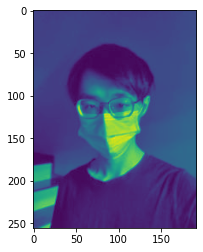

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

Text(0.5, 1.0, 'Training and Validation Loss')

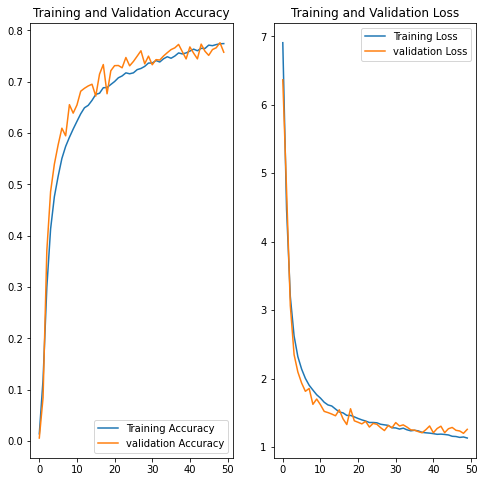

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

In [15]:
score = model.evaluate(X_test, y_test)
print(score)

504/504 [==============================] - 1s 3ms/step - loss: 1.2395 - accuracy: 0.7645
[1.2394816875457764, 0.7644720673561096]


In [16]:
model.layers

In [17]:
X_new = X_test[0:10]
y_pred_new = model.predict(X_new)
print(np.argmax(y_pred_new, axis=-1))
print(y_test[0:10])

[ 37  20 101 141  66  79  59  95  59  30]
[114  20 101 141  66  34 103  95  37  30]


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.91      0.82        92
           1       0.90      0.97      0.93        91
           2       0.86      0.91      0.88       100
           3       0.84      0.96      0.90        98
           4       0.77      1.00      0.87        93
           5       0.84      0.96      0.89       102
           6       0.74      0.90      0.81       103
           7       0.83      0.81      0.82        97
           8       0.68      0.74      0.71       108
           9       0.89      0.70      0.78       106
          10       0.62      0.79      0.69       111
          11       0.69      0.87      0.77        97
          12       0.64      0.59      0.62        98
          13       0.84      0.75      0.79       108
          14       0.94      0.98      0.96        87
          15       0.83      0.84      0.83        86
          16       0.76      0.63      0.69       125
  

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 192)          0         
_________________________________________________________________
flatten (Flatten)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               12583168  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0